# Data Analysis
## Data import and formatting

In [107]:
# Import packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [71]:
trades = pd.read_excel("../data/qq_trade_df.xlsx")
trades.drop('excess_return', axis=1, inplace=True)
column_name_dict = {
    'BioGuideID':'bioguideID',
    'congress':'congress_num',
    'Ticker':'ticker',
    'Traded':'trade_date',
    'Transaction':'transaction_type',
    'price':'trade_price',
    'price_plus_365':'price_365_days_after_trade',
    'Sector':'sector',
    'Industry':'industry',
    'S&P500 Change (%)':'market_return',
    '365Day_excess_return':'excess_return',
    'Party':'party', 
    'State':'state',
    'Name':'name'
}

trades.rename(columns=column_name_dict, inplace=True)

# Add unique trade id
trades['trade_id'] = trades.index
trades.head(3)


,ticker,TickerType,Company,trade_date,transaction_type,Trade_Size_USD,Status,Subholding,Description,name,...,Symbol,sector,industry,Date,Date_Plus_365,market_return,price_change_pct,excess_return,congress_num,trade_id
0,CORP,ST,PIMCO INVESTMENT GRADE CORPORATE BOND INDEX EX...,2023-11-28,Sale,"$1,001 - $15,000",NEW,UNITED IRA,11/28/23 SOLD 383.695 SHARES OF PIMCO INVESTME...,Carol Devine Miller,...,NaN,NaN,NaN,2023-11-28,2024-11-27,31.7,4.183116,-27.516884,118,0
1,TMO,ST,THERMO FISHER SCIENTIFIC INC,2023-11-28,Sale,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,...,TMO,Industrials,Industrial Machinery/Components,2023-11-28,2024-11-27,31.7,8.995306,-22.704694,118,1
2,CRT,ST,CROSS TIMBERS ROYALTY TRUST,2023-11-28,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Virginia Foxx,...,CRT,Energy,Oil & Gas Production,2023-11-28,2024-11-27,31.7,-45.572142,-77.272142,118,2


In [72]:
representative_info = pd.read_excel("../data/legislator_table.xlsx")
representative_info.columns = representative_info.columns.str.replace('bioguide','bioguideID')
representative_info.head(3)

,Unnamed: 0,bioguideID,govtrack,icpsr,wikipedia,first_name,last_name,birthday,gender,term_type,term_start,term_end,state,class,party
0,0,B000944,400050,29389.0,NaN,Sherrod,Brown,1952-11-09,M,rep,1993-01-05,1995-01-03,OH,NaN,Democrat
1,1,C000127,300018,39310.0,NaN,Maria,Cantwell,1958-10-13,F,rep,1993-01-05,1995-01-03,WA,NaN,Democrat
2,2,C000141,400064,15408.0,NaN,Benjamin,Cardin,1943-10-05,M,rep,1987-01-06,1989-01-03,MD,NaN,Democrat


In [73]:
committee_assignments = pd.read_excel('../data/committee_assignments.xlsx')
committee_assignments.drop(['State', 'Representative', 'Last Name', 'First Name', 'Middle Initial'], axis=1, inplace=True)


column_name_dict = {
    'Committee':'committee',
    'Rank':'rank',
    'Congress':'congress_num',
}

committee_assignments.rename(columns=column_name_dict, inplace=True)


committee_assignments.head(3)

,committee,rank,congress_num,bioguideID
0,agriculture,NaN,117,A000370
1,education and labor,NaN,117,A000370
2,financial services,NaN,117,A000370


In [74]:
master_df = trades.merge(representative_info, on='bioguideID', how='left')
master_df

,ticker,TickerType,Company,trade_date,transaction_type,Trade_Size_USD,Status,Subholding,Description,name,...,first_name,last_name,birthday,gender,term_type,term_start,term_end,state_y,class,party_y
0,CORP,ST,PIMCO INVESTMENT GRADE CORPORATE BOND INDEX EX...,2023-11-28,Sale,"$1,001 - $15,000",NEW,UNITED IRA,11/28/23 SOLD 383.695 SHARES OF PIMCO INVESTME...,Carol Devine Miller,...,Carol,Miller,1950-11-04,F,rep,2019-01-03,2021-01-03,WV,NaN,Republican
1,TMO,ST,THERMO FISHER SCIENTIFIC INC,2023-11-28,Sale,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,...,Josh,Gottheimer,1975-03-08,M,rep,2017-01-03,2019-01-03,NJ,NaN,Democrat
2,CRT,ST,CROSS TIMBERS ROYALTY TRUST,2023-11-28,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Virginia Foxx,...,Virginia,Foxx,1943-06-29,F,rep,2005-01-04,2007-01-03,NC,NaN,Republican
3,HCA,ST,"HCA HEALTHCARE, INC.",2023-11-28,Sale,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,...,Josh,Gottheimer,1975-03-08,M,rep,2017-01-03,2019-01-03,NJ,NaN,Democrat
4,PANW,ST,"PALO ALTO NETWORKS, INC.",2023-11-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,...,Josh,Gottheimer,1975-03-08,M,rep,2017-01-03,2019-01-03,NJ,NaN,Democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38816,LMT,NaN,LOCKHEED MARTIN CORPORATION,2012-11-13,Sale,"$1,001 - $15,000",NEW,BROKERAGE #1 - EDJ 2718,NaN,Ms. Tammy Duckworth,...,Tammy,Duckworth,1968-03-12,F,rep,2013-01-03,2015-01-03,IL,NaN,Democrat
38817,DD,Stock,E. I. du Pont de Nemours and Company (NYSE),2012-09-13,Purchase,"$1,001 - $15,000",New,NaN,NaN,"Carper, Thomas R.",...,Thomas,Carper,1947-01-23,M,rep,1983-01-03,1985-01-03,DE,NaN,Democrat
38818,PG,NaN,PROCTER & GAMBLE COMPANY,2012-08-16,Sale,"$1,001 - $15,000",NEW,BROKERAGE #1 - EDJ 2718,NaN,Ms. Tammy Duckworth,...,Tammy,Duckworth,1968-03-12,F,rep,2013-01-03,2015-01-03,IL,NaN,Democrat
38819,CAT,NaN,"CATERPILLAR, INC.",2012-07-26,Purchase,"$1,001 - $15,000",NEW,BROKERAGE #2 USAA 8425,NaN,Ms. Tammy Duckworth,...,Tammy,Duckworth,1968-03-12,F,rep,2013-01-03,2015-01-03,IL,NaN,Democrat


In [75]:
# One-hot encode the 'committee' column
committee_dummies = pd.get_dummies(committee_assignments['committee'], prefix='committee')

# Combine 'bioguideID', 'congress_num', and committee indicators
committee_assignments_encoded = pd.concat(
    [committee_assignments[['bioguideID', 'congress_num']], committee_dummies],
    axis=1
)

# Aggregate committee indicators by 'bioguideID' and 'congress_num'
committee_indicators = committee_assignments_encoded.groupby(
    ['bioguideID', 'congress_num']
).max().reset_index()

# Keep only 'bioguideID', 'congress_num', and committee indicators
committee_columns = [col for col in committee_indicators.columns if col.startswith('committee_')]
committee_indicators = committee_indicators[['bioguideID', 'congress_num'] + committee_columns]

# Create a binary indicator for Chair or Vice Chair
committee_assignments['is_chair_or_vice'] = committee_assignments['rank'].apply(
    lambda x: 1 if x in ['Chair', 'Vice Chair'] else 0
)

# Aggregate the rank indicator
rank_indicators = committee_assignments.groupby(
    ['bioguideID', 'congress_num']
)['is_chair_or_vice'].max().reset_index()

rank_indicators = rank_indicators[['bioguideID', 'congress_num', 'is_chair_or_vice']]

trades_columns = ['trade_id', 'bioguideID', 'congress_num', 'trade_date', 'transaction_type',
                  'trade_price', 'price_365_days_after_trade', 'price_change_pct', 'market_return','excess_return', 'sector','industry']
trades = trades[trades_columns]

# Merge trades with committee indicators on 'bioguideID' and 'congress_num'
master_df = trades.merge(
    committee_indicators,
    on=['bioguideID', 'congress_num'],
    how='left'
)

# Merge the rank indicators
master_df = master_df.merge(
    rank_indicators,
    on=['bioguideID', 'congress_num'],
    how='left'
)

# Fill NaN values in committee indicators
committee_columns = [col for col in master_df.columns if col.startswith('committee_')]
master_df[committee_columns] = master_df[committee_columns].fillna(0)

# Fill NaN values in 'is_chair_or_vice'
master_df['is_chair_or_vice'] = master_df['is_chair_or_vice'].fillna(0)

# Merge with representative_info to get 'party', 'state', 'gender', etc.
master_df = master_df.merge(
    representative_info[['bioguideID', 'party', 'state', 'gender', 'term_start']],
    on='bioguideID',
    how='left'
)

# Ensure 'term_start' is in datetime format
master_df['term_start'] = pd.to_datetime(master_df['term_start'])

# Calculate seniority in years
master_df['seniority_years'] = (master_df['trade_date'] - master_df['term_start']).dt.days / 365.25


In [76]:
master_df.head()


,trade_id,bioguideID,congress_num,trade_date,transaction_type,trade_price,price_365_days_after_trade,price_change_pct,market_return,excess_return,...,committee_veterans’ affairs,committee_veterans’ affairs foreign affairs,committee_veterans’affairs,committee_ways and means,is_chair_or_vice,party,state,gender,term_start,seniority_years
0,0,M001205,118,2023-11-28,Sale,93.709999,97.629997,4.183116,31.7,-27.516884,...,0,0,0,0,0.0,Republican,WV,F,2019-01-03,4.900753
1,1,G000583,118,2023-11-28,Sale,485.920013,529.630005,8.995306,31.7,-22.704694,...,0,0,0,0,0.0,Democrat,NJ,M,2017-01-03,6.899384
2,2,F000450,118,2023-11-28,Purchase,20.100000,10.940000,-45.572142,31.7,-77.272142,...,0,0,0,0,0.0,Republican,NC,F,2005-01-04,18.896646
3,3,G000583,118,2023-11-28,Sale,246.649994,327.220001,32.665724,31.7,0.965724,...,0,0,0,0,0.0,Democrat,NJ,M,2017-01-03,6.899384
4,4,G000583,118,2023-11-28,Purchase,277.829987,387.820007,39.588967,31.7,7.888967,...,0,0,0,0,0.0,Democrat,NJ,M,2017-01-03,6.899384


In [77]:
# Store master_df
master_df.to_excel('../data/master_df.xlsx',index=False)

In [78]:
# Restore master_df
# master_df = pd.read_excel('../data/master_df.xlsx')

### Define Success
First we need to define what success is. Since we are only evaluating if the trade was "correct", not how good it was, we will want to use a binary outcome. 

Trade Success -  Stock performs in predicted manner (See table below)
Market Success - Stock performs in predicted manner **in excess of market**(See table below)
|Transaction Type|trade_success|market_success|
| --- | --- | ----------- |
|Purchase| price_change_pct > 0 | excess_return > 0|
|Sale| price_change_pct < 0 | (price_change_pct < 0 ) & (excess_return < 0)|
|Sale (Partial)| price_change_pct < 0 | (price_change_pct < 0 ) & (excess_return < 0)|
Sale (Full)| price_change_pct < 0 | (price_change_pct < 0 ) & (excess_return < 0)|

In [79]:
def define_trade_success(row):
    if row['transaction_type'] in ['Purchase']:
        return 1 if row['price_change_pct'] > 0 else 0
    elif row['transaction_type'] in ['Sale', 'Sale (Partial)', 'Sale (Full)']:
        return 1 if row['price_change_pct'] < 0 else 0
    else:
        return None

master_df['trade_success'] = master_df.apply(define_trade_success, axis=1)
master_df = master_df.dropna(subset=['trade_success'])


def define_market_success(row):
    if row['transaction_type'] in ['Purchase']:
        return 1 if row['excess_return'] > 0 else 0
    elif row['transaction_type'] in ['Sale', 'Sale (Partial)', 'Sale (Full)']:
        return 1 if (row['excess_return'] < 0) & (row['price_change_pct'] < 0) else 0
    else:
        return None
    
master_df['market_success'] = master_df.apply(define_market_success, axis=1)
master_df = master_df.dropna(subset=['market_success'])

## Exploration

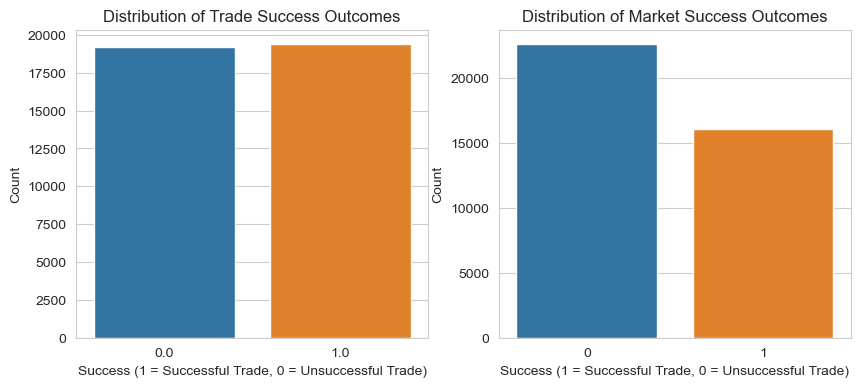

In [80]:
# Configure visual settings
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)  # row 1, column 2, count 1
# Countplot of the 'trade_success' variable
sns.countplot(x='trade_success', data=master_df)
plt.title('Distribution of Trade Success Outcomes')
plt.xlabel('Success (1 = Successful Trade, 0 = Unsuccessful Trade)')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
# Countplot of the 'market_success' variable
sns.countplot(x='market_success', data=master_df)
plt.title('Distribution of Market Success Outcomes')
plt.xlabel('Success (1 = Successful Trade, 0 = Unsuccessful Trade)')
plt.ylabel('Count')


plt.show()

c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

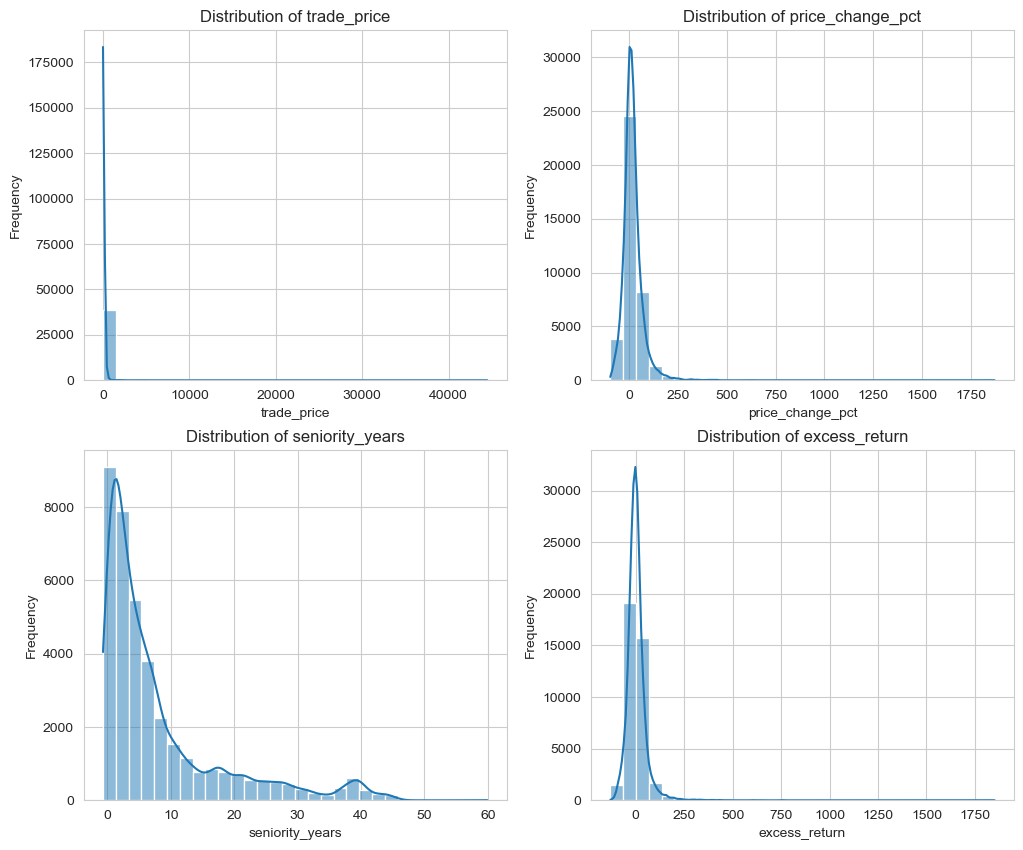

In [81]:
# List of numerical variables
numerical_vars = ['trade_price', 'price_change_pct', 'seniority_years', 'excess_return']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]
    sns.histplot(master_df[var], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

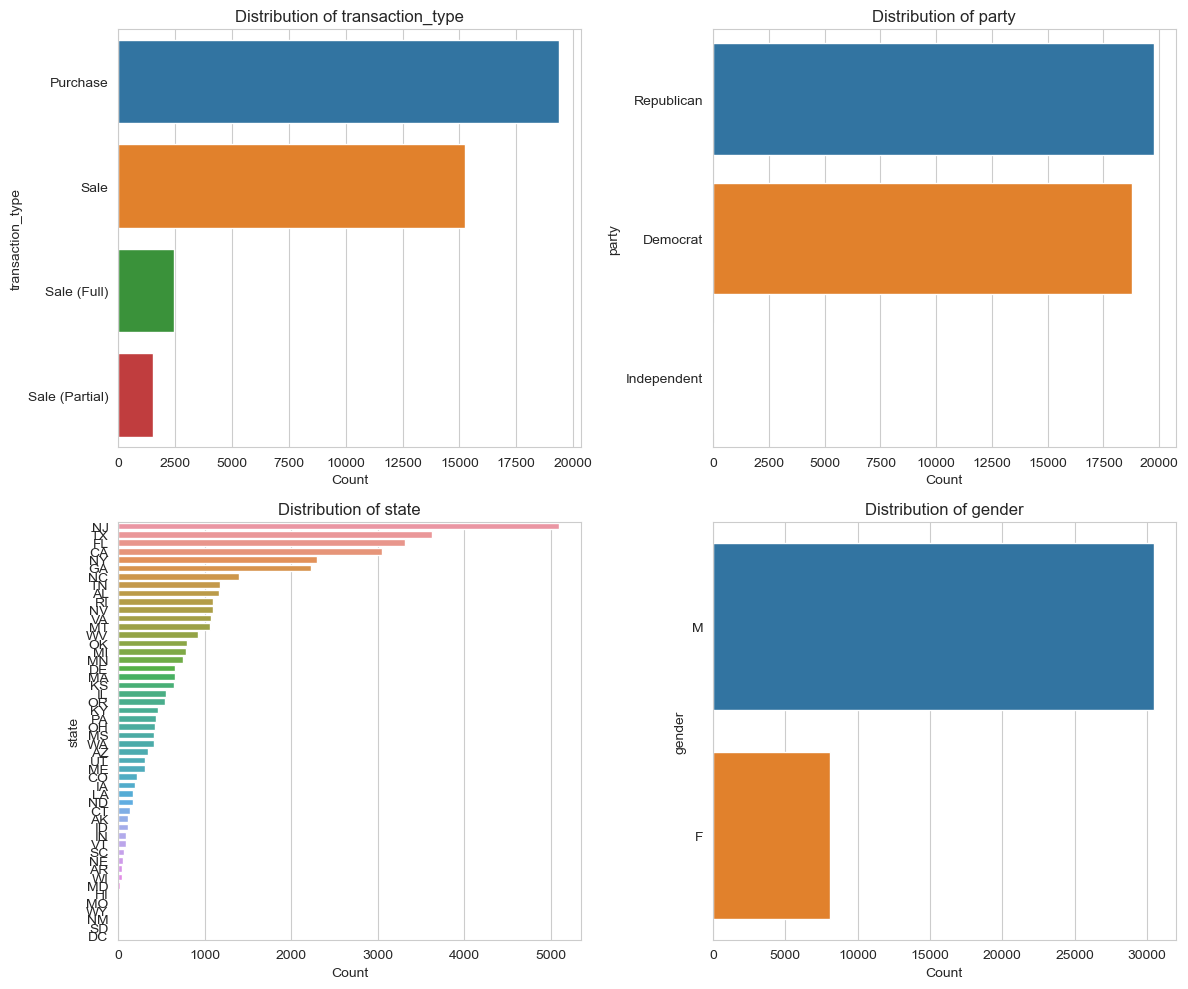

In [82]:
# List of categorical variables
categorical_vars = ['transaction_type', 'party', 'state', 'gender']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, var in enumerate(categorical_vars):
    ax = axes[idx]
    sns.countplot(y=var, data=master_df, order=master_df[var].value_counts().index, ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel('Count')
    ax.set_ylabel(var)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [110]:
# Z-score for 95% confidence level
z = norm.ppf(0.975)  # Approximately 1.96

def compute_confidence_interval(successes, total):
    p = successes / total
    se = np.sqrt(p * (1 - p) / total)  # Standard error
    lower = p - z * se
    upper = p + z * se
    # Ensure the bounds are within [0,1]
    lower = max(0, lower)
    upper = min(1, upper)
    return p, lower, upper

C:\Users\Jerrin\AppData\Local\Temp\ipykernel_65840\4145358094.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='success_rate', y='committee', data=committee_success_df, color='skyblue', ci=None)


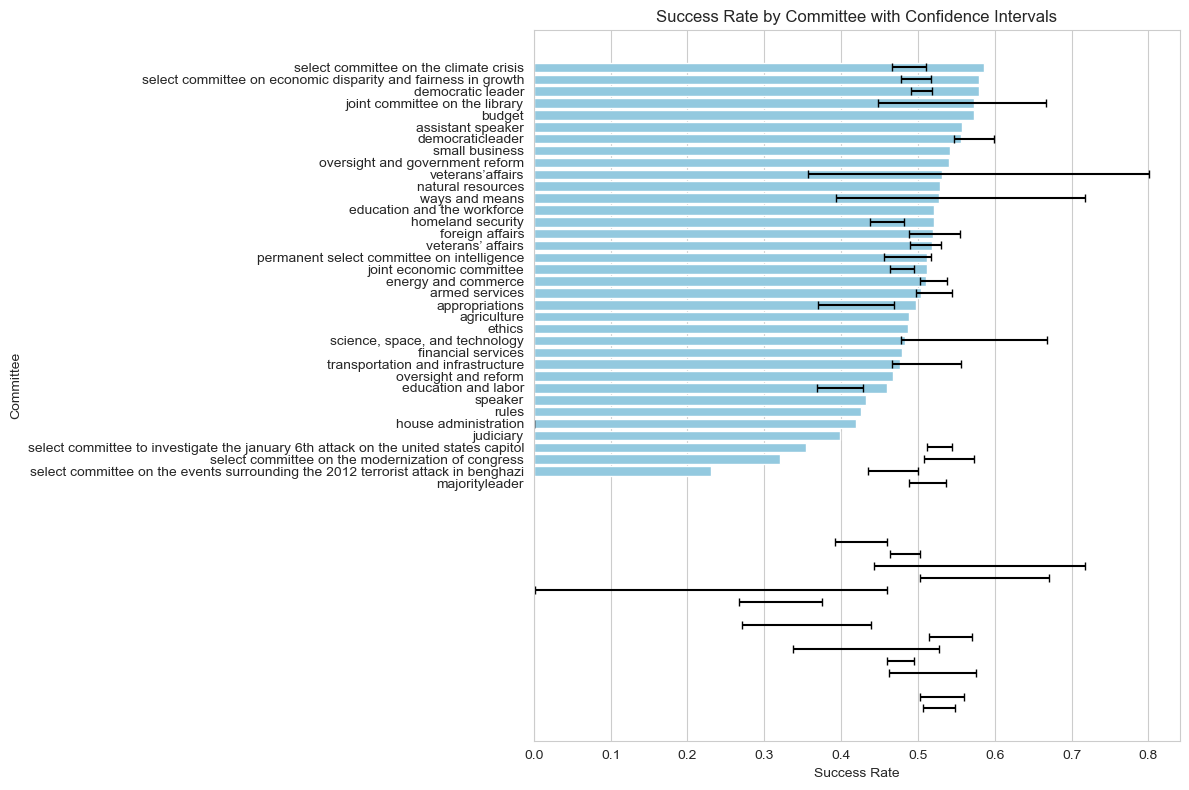

In [112]:
committee_success_rates = []

for committee in committee_columns:
    committee_name = committee.replace('committee_', '')
    total_trades = master_df[master_df[committee] == 1].shape[0]
    successes = master_df[(master_df[committee] == 1) & (master_df['trade_success'] == 1)].shape[0]
    if total_trades > 0:
        p, lower, upper = compute_confidence_interval(successes, total_trades)
        committee_success_rates.append({
            'committee': committee_name,
            'success_rate': p,
            'lower_ci': lower,
            'upper_ci': upper,
            'total_trades': total_trades
        })
    else:
        # Handle cases with no trades
        committee_success_rates.append({
            'committee': committee_name,
            'success_rate': np.nan,
            'lower_ci': np.nan,
            'upper_ci': np.nan,
            'total_trades': total_trades
        })

committee_success_df = pd.DataFrame(committee_success_rates)
# Drop committees with no trades
committee_success_df = committee_success_df.dropna(subset=['success_rate'])

# Sort by success rate
committee_success_df.sort_values('success_rate', ascending=False, inplace=True)

# Plot with error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='success_rate', y='committee', data=committee_success_df, color='skyblue', ci=None)

# Add error bars manually
for index, row in committee_success_df.iterrows():
    plt.errorbar(
        x=row['success_rate'],
        y=index,
        xerr=[[row['success_rate'] - row['lower_ci']], [row['upper_ci'] - row['success_rate']]],
        fmt='none',
        ecolor='black',
        capsize=3
    )

plt.title('Success Rate by Committee with Confidence Intervals')
plt.xlabel('Success Rate')
plt.ylabel('Committee')
plt.tight_layout()
plt.show()


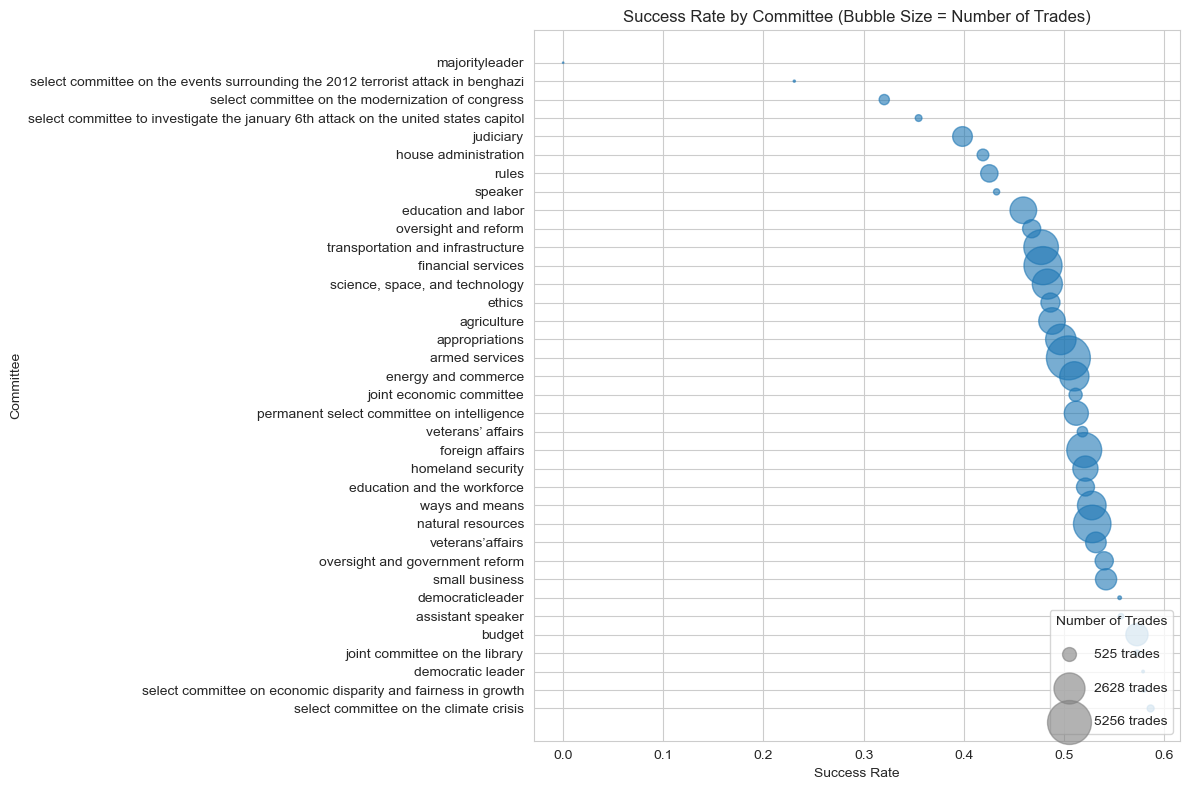

In [113]:
plt.figure(figsize=(12, 8))

# Normalize the bubble sizes for better visibility
max_trades = committee_success_df['total_trades'].max()
bubble_sizes = committee_success_df['total_trades'] / max_trades * 1000  # Adjust the scaling factor as needed

plt.scatter(
    x='success_rate',
    y='committee',
    s=bubble_sizes,
    data=committee_success_df,
    alpha=0.6
)

plt.title('Success Rate by Committee (Bubble Size = Number of Trades)')
plt.xlabel('Success Rate')
plt.ylabel('Committee')

# Add a legend for bubble sizes
import matplotlib.patches as mpatches

sizes = [100, 500, 1000]  # Example sizes
handles = [plt.scatter([], [], s=size, color='gray', alpha=0.6) for size in sizes]
labels = [str(int(size / 1000 * max_trades)) + ' trades' for size in sizes]

plt.legend(handles, labels, title='Number of Trades', labelspacing=1.5, loc='lower right', frameon=True)
plt.tight_layout()
plt.show()

C:\Users\Jerrin\AppData\Local\Temp\ipykernel_65840\2330920512.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='success_rate', y='committee', data=filtered_committee_df, color='skyblue', ci=None)


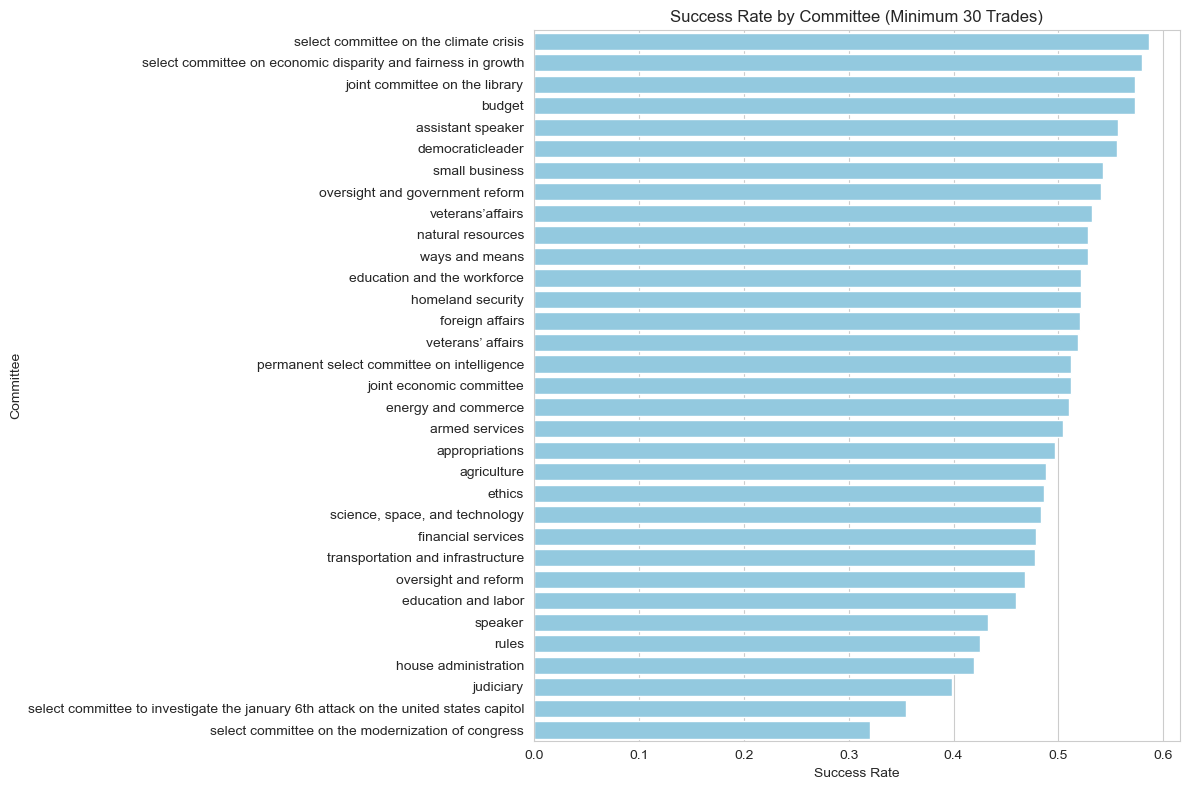

In [118]:
# Set minimum number of trades to include
min_trades = 30

# Filter the DataFrame
filtered_committee_df = committee_success_df[committee_success_df['total_trades'] >= min_trades]

plt.figure(figsize=(12, 8))
sns.barplot(x='success_rate', y='committee', data=filtered_committee_df, color='skyblue', ci=None)

plt.title(f'Success Rate by Committee (Minimum {min_trades} Trades)')
plt.xlabel('Success Rate')
plt.ylabel('Committee')
plt.tight_layout()
plt.show()

C:\Users\Jerrin\AppData\Local\Temp\ipykernel_65840\1177888454.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='success_rate', y='sector', data=sector_success_df, color='skyblue', ci=None)


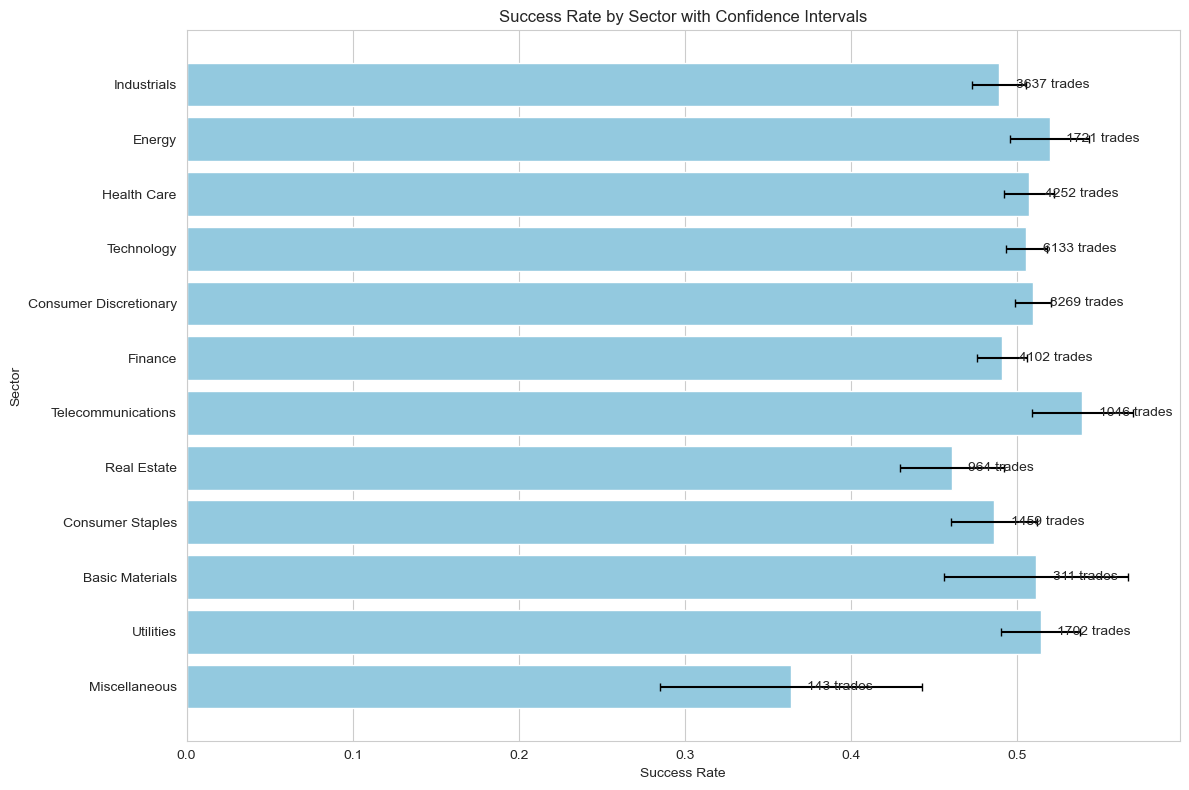

In [117]:
# Set minimum number of trades to include
min_trades = 30

# Calculate success rates and confidence intervals for sectors
sector_success_rates = []

for sector in master_df['sector'].dropna().unique():
    sector_df = master_df[master_df['sector'] == sector]
    total_trades = sector_df.shape[0]
    successes = sector_df['trade_success'].sum()
    p, lower, upper = compute_confidence_interval(successes, total_trades)
    sector_success_rates.append({
        'sector': sector,
        'success_rate': p,
        'lower_ci': lower,
        'upper_ci': upper,
        'total_trades': total_trades
    })

sector_success_df = pd.DataFrame(sector_success_rates)

# Filter sectors with sufficient data
sector_success_df = sector_success_df[sector_success_df['total_trades'] >= min_trades]

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='success_rate', y='sector', data=sector_success_df, color='skyblue', ci=None)

# Add error bars and sample size annotations
for index, row in sector_success_df.iterrows():
    plt.errorbar(
        x=row['success_rate'],
        y=index,
        xerr=[[row['success_rate'] - row['lower_ci']], [row['upper_ci'] - row['success_rate']]],
        fmt='none',
        ecolor='black',
        capsize=3
    )
    plt.text(
        x=row['success_rate'] + 0.01,
        y=index,
        s=f"{int(row['total_trades'])} trades",
        va='center'
    )

plt.title('Success Rate by Sector with Confidence Intervals')
plt.xlabel('Success Rate')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()


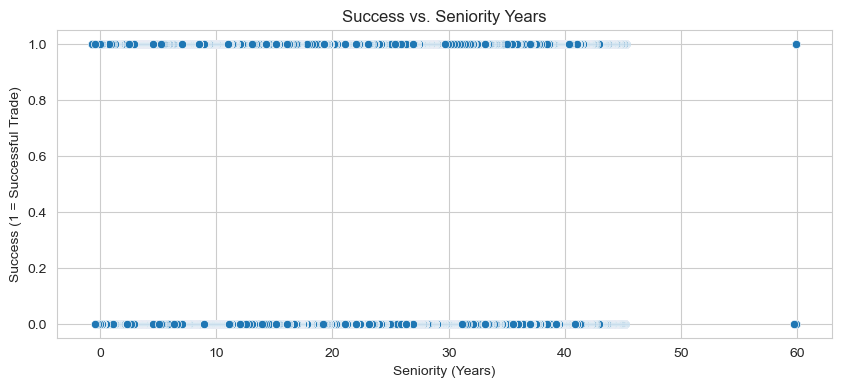

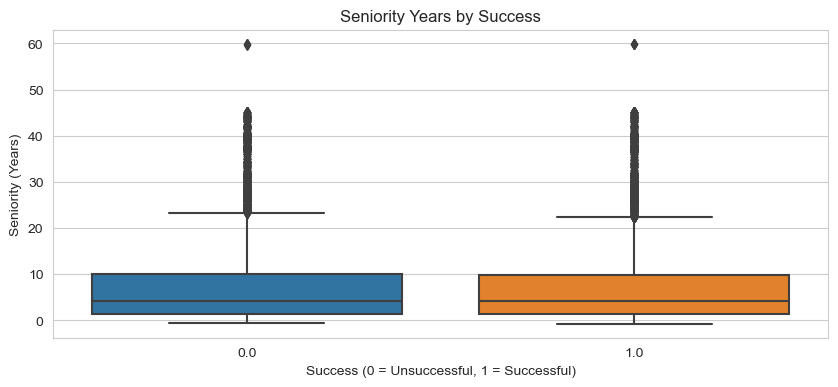

In [85]:
# Scatter plot of seniority vs. success
plt.figure()
sns.scatterplot(x='seniority_years', y='trade_success', data=master_df)
plt.title('Success vs. Seniority Years')
plt.xlabel('Seniority (Years)')
plt.ylabel('Success (1 = Successful Trade)')
plt.show()

# Box plot
plt.figure()
sns.boxplot(x='trade_success', y='seniority_years', data=master_df)
plt.title('Seniority Years by Success')
plt.xlabel('Success (0 = Unsuccessful, 1 = Successful)')
plt.ylabel('Seniority (Years)')
plt.show()

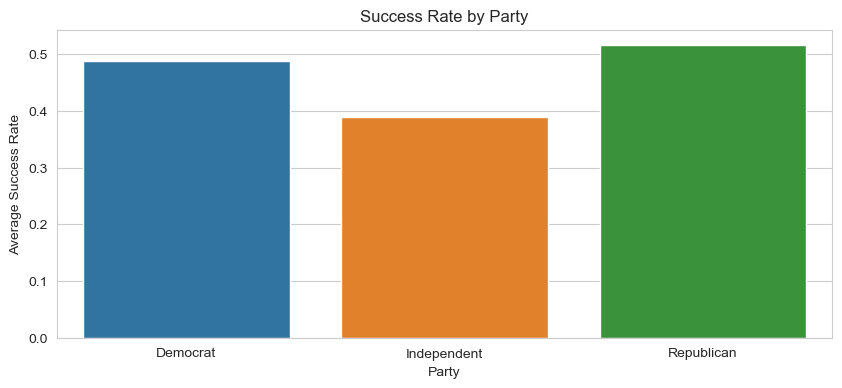

In [86]:
# Calculate success rates by party
party_success = master_df.groupby('party')['trade_success'].mean().reset_index()

# Plot
plt.figure()
sns.barplot(x='party', y='trade_success', data=party_success)
plt.title('Success Rate by Party')
plt.xlabel('Party')
plt.ylabel('Average Success Rate')
plt.show()

c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-pa

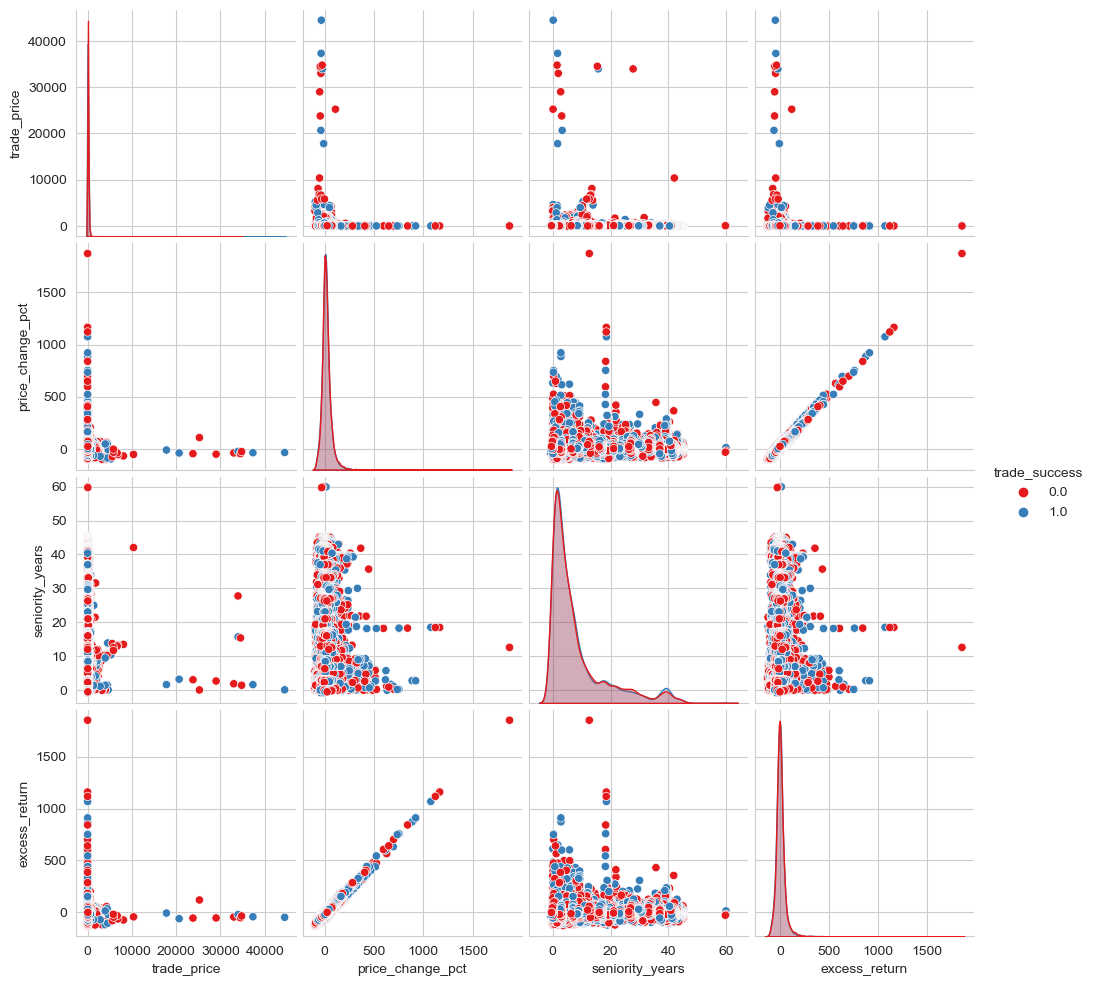

In [91]:
# Select variables for pair plot
pairplot_vars = ['trade_price', 'price_change_pct', 'seniority_years', 'excess_return', 'trade_success']

sns.pairplot(master_df[pairplot_vars], hue='trade_success', palette='Set1')
plt.show()

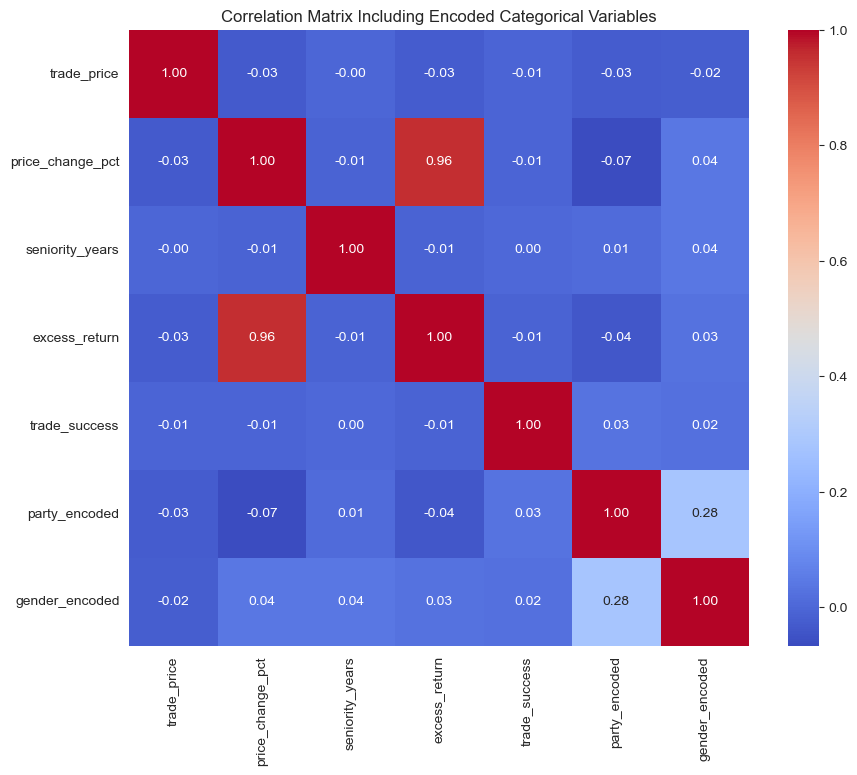

In [93]:
# Encode 'party', 'gender'
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['party', 'gender']:
    le = LabelEncoder()
    master_df[col+'_encoded'] = le.fit_transform(master_df[col])
    label_encoders[col] = le

# Include the newly encoded variables
corr_vars = numerical_vars + ['trade_success', 'party_encoded', 'gender_encoded']

# Compute correlation matrix
corr_matrix = master_df[corr_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Including Encoded Categorical Variables')
plt.show()

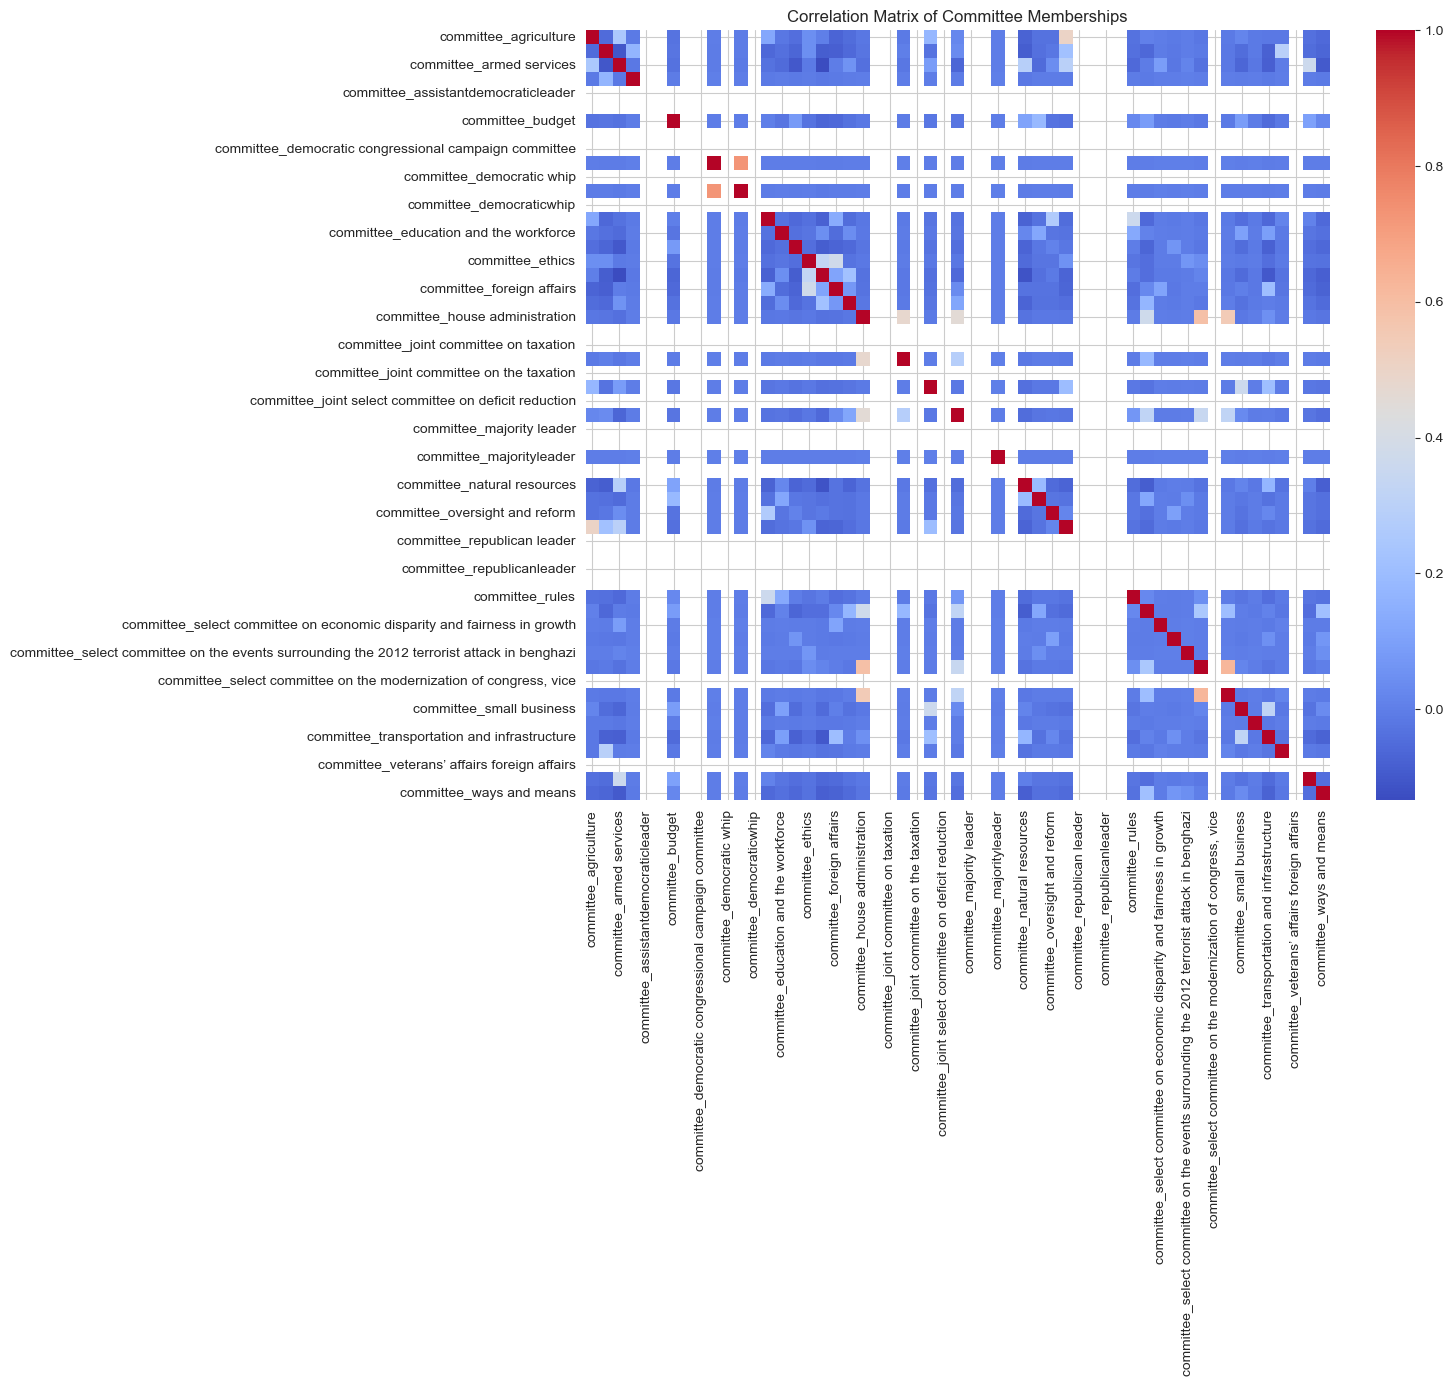

In [94]:
# Compute correlation matrix for committee indicators
committee_corr = master_df[committee_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(committee_corr, cmap='coolwarm')
plt.title('Correlation Matrix of Committee Memberships')
plt.show()

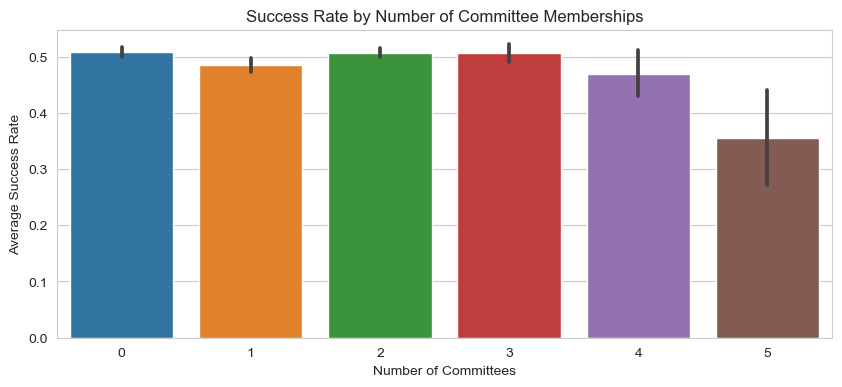

In [96]:
# Calculate the number of committees per representative per trade
master_df['num_committees'] = master_df[committee_columns].sum(axis=1)

# Plot success rate vs. number of committees
plt.figure()
sns.barplot(x='num_committees', y='trade_success', data=master_df)
plt.title('Success Rate by Number of Committee Memberships')
plt.xlabel('Number of Committees')
plt.ylabel('Average Success Rate')
plt.show()

c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


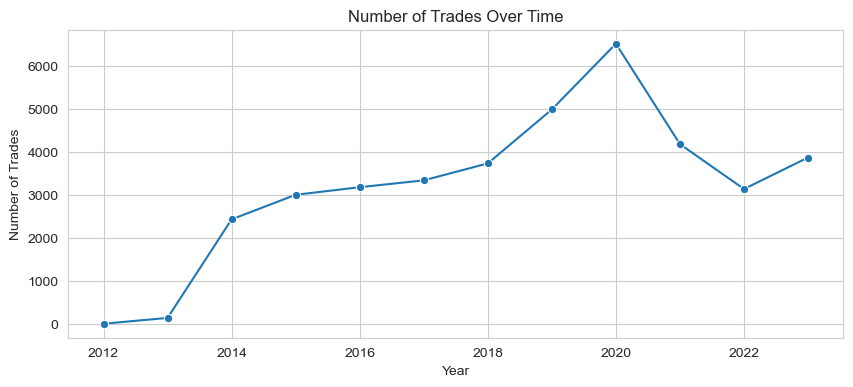

In [97]:
# Extract year from 'trade_date'
master_df['trade_year'] = master_df['trade_date'].dt.year

# Number of trades per year
trades_per_year = master_df.groupby('trade_year').size().reset_index(name='num_trades')

# Plot
plt.figure()
sns.lineplot(x='trade_year', y='num_trades', data=trades_per_year, marker='o')
plt.title('Number of Trades Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Trades')
plt.show()

c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jerrin\miniconda3\envs\Forecast_2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


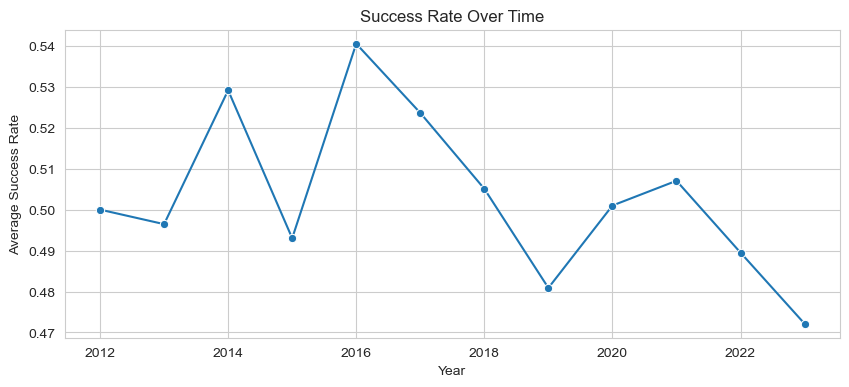

In [98]:
# Success rate per year
success_per_year = master_df.groupby('trade_year')['trade_success'].mean().reset_index()

# Plot
plt.figure()
sns.lineplot(x='trade_year', y='trade_success', data=success_per_year, marker='o')
plt.title('Success Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.show()

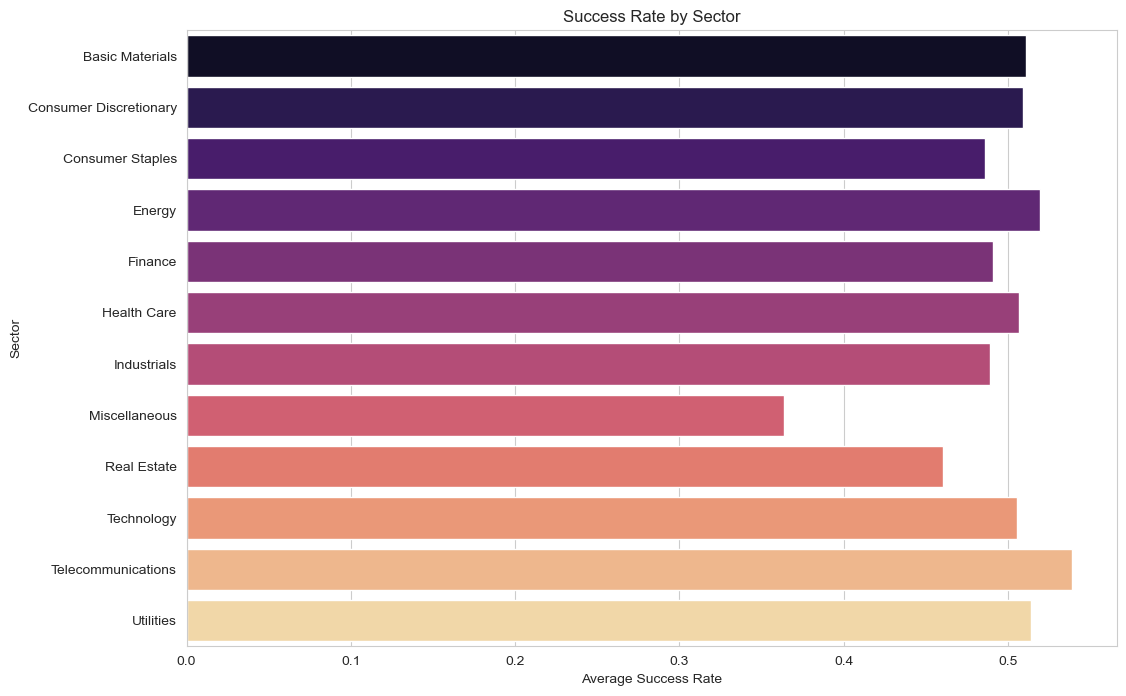

In [101]:
# Calculate success rates by sector
sector_success = master_df.groupby('sector')['trade_success'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='trade_success', y='sector', data=sector_success, palette='magma')
plt.title('Success Rate by Sector')
plt.xlabel('Average Success Rate')
plt.ylabel('Sector')
plt.show()

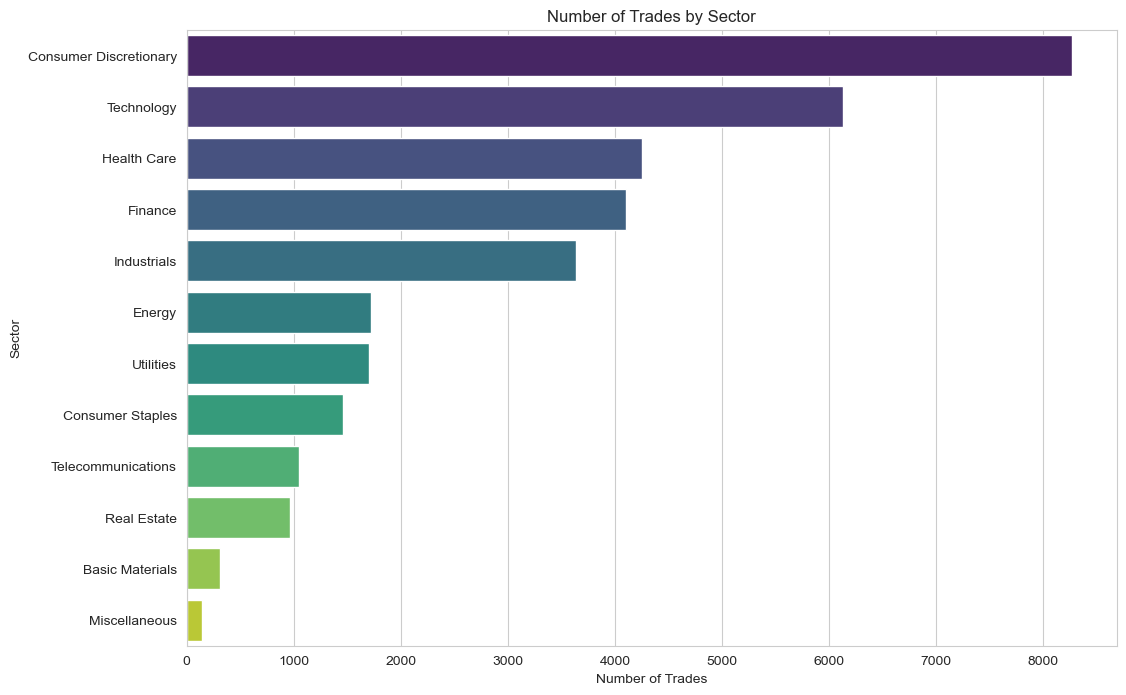

In [102]:
# Number of trades per sector
sector_counts = master_df['sector'].value_counts().reset_index()
sector_counts.columns = ['sector', 'num_trades']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='num_trades', y='sector', data=sector_counts, palette='viridis')
plt.title('Number of Trades by Sector')
plt.xlabel('Number of Trades')
plt.ylabel('Sector')
plt.show()

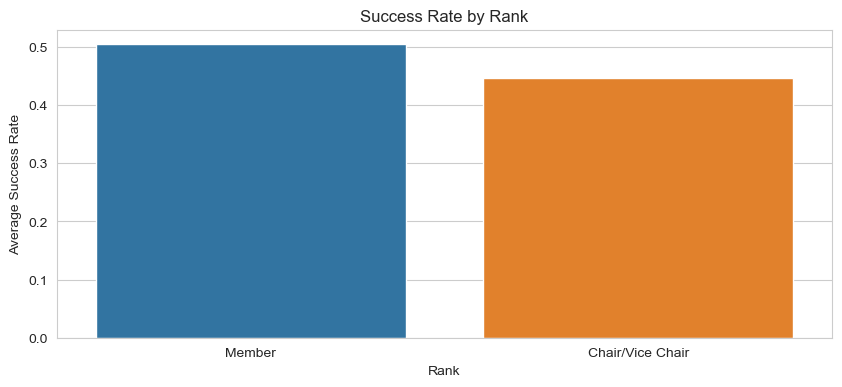

In [104]:
# Success rates for Chairs/Vice Chairs vs. other members
rank_success = master_df.groupby('is_chair_or_vice')['trade_success'].mean().reset_index()
rank_success['Rank'] = rank_success['is_chair_or_vice'].map({0: 'Member', 1: 'Chair/Vice Chair'})

# Plot
plt.figure()
sns.barplot(x='Rank', y='trade_success', data=rank_success)
plt.title('Success Rate by Rank')
plt.xlabel('Rank')
plt.ylabel('Average Success Rate')
plt.show()

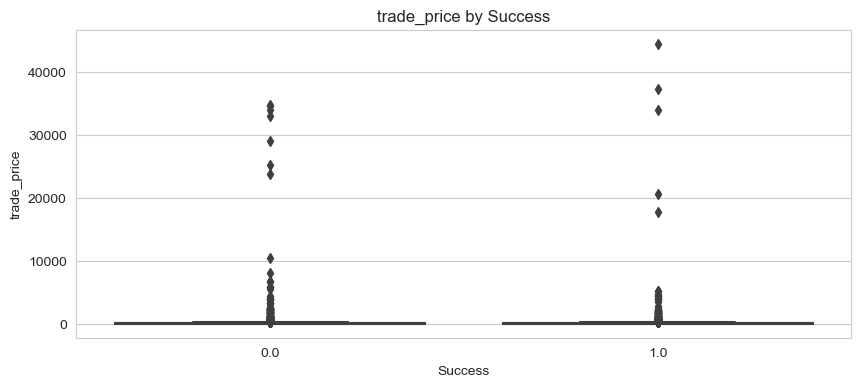

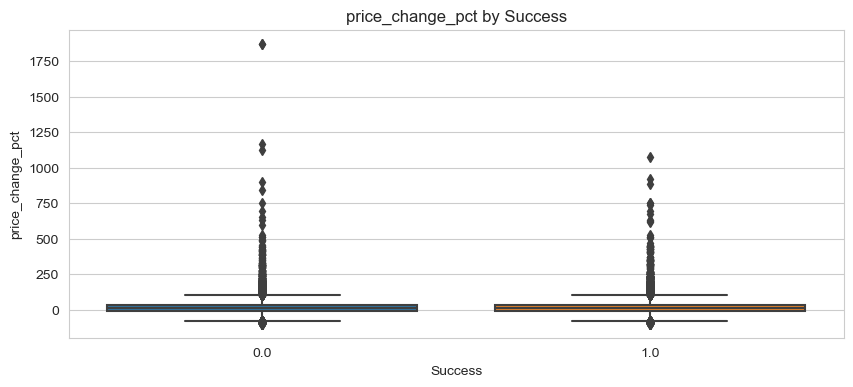

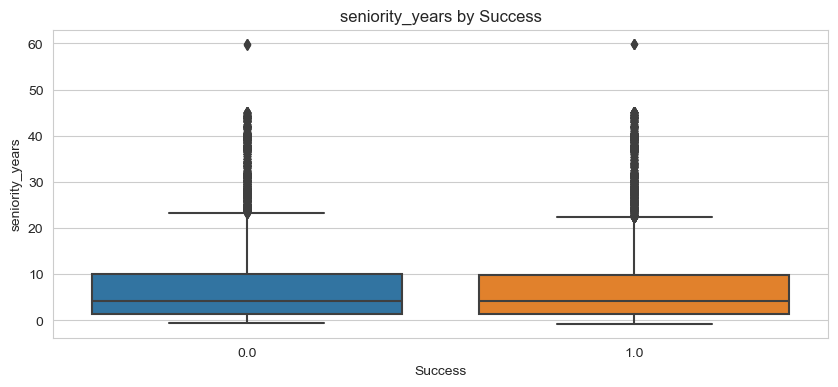

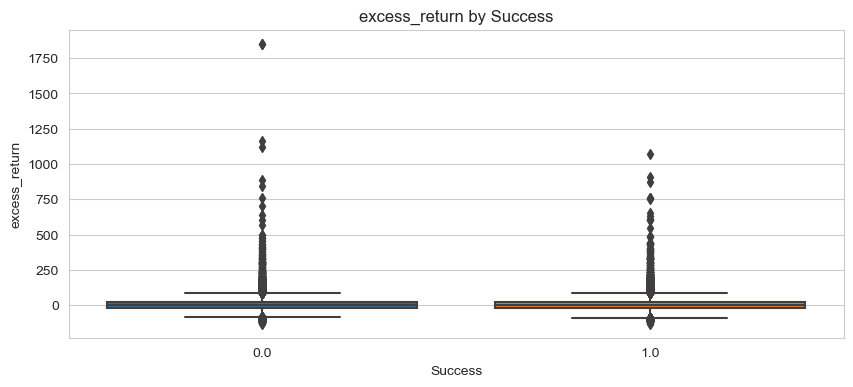

In [106]:
for var in numerical_vars:
    plt.figure()
    sns.boxplot(x='trade_success', y=var, data=master_df)
    plt.title(f'{var} by Success')
    plt.xlabel('Success')
    plt.ylabel(var)
    plt.show()

## Analysis (Still in progress)

In [15]:
# One-hot encode categorical variables
categorical_vars = ['party', 'state', 'gender', 'sector', 'industry']
master_df = pd.get_dummies(master_df, columns=categorical_vars, drop_first=True)

In [25]:
# Define features and target
X = master_df.drop(columns=[
    'trade_id', 'trade_success', 'trade_date', 'bioguideID', 'transaction_type',
    'price_365_days_after_trade', 'price_change_pct', 'congress_num', 'market_return',
    'term_start' 
])
y = master_df['trade_success']

In [26]:
# Identify numerical variables
numerical_vars = ['seniority_years', 'excess_return', 'trade_price']

# Scale numerical variables
scaler = StandardScaler()
X[numerical_vars] = scaler.fit_transform(X[numerical_vars])

In [27]:
X.dtypes

trade_price                                                     float64
excess_return                                                   float64
committee_Agriculture                                            object
committee_Appropriations                                         object
committee_Armed Services                                         object
                                                                 ...   
industry_Trucking Freight/Courier Services                         bool
industry_Trusts Except Educational Religious and Charitable        bool
industry_Water Sewer Pipeline Comm & Power Line Construction       bool
industry_Water Supply                                              bool
industry_Wholesale Distributors                                    bool
Length: 326, dtype: object

## Regression

In [28]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

from sklearn.linear_model import LogisticRegression

# Train the model with L1 penalty (Lasso)
model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

In [29]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      3843
         1.0       0.97      0.80      0.88      3874

    accuracy                           0.89      7717
   macro avg       0.90      0.89      0.89      7717
weighted avg       0.90      0.89      0.89      7717

